# <a href="https://miptstats.github.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФЭФМ)</a>
## Домашнее задание 2 &mdash; часть В

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**. Другие форматы не принимаются.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.</font>

In [79]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
%matplotlib inline

----

### Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Пусть выборка $X_1, ... X_{100}$ имеет распределение $Bern(\theta)$. <a href="https://miptstats.github.io/courses/python/07_random.html#2.-Работа-с-библиотекой-scipy.stats.">Сгенерируйте</a> такую выборку, взяв $\theta=1/2$. Для каждой подвыборке вида $X_1, ... X_i$, $1 \le i \le 100$ постройте асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha=0.95$. Формула для интервала была выведена на семинаре. Постройте график зависимости доверительного интервала от размера выборки (см. <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar3.html#Задача-1.">код с семинара</a>). 

Аналогичные действия выполните для выборки из распределения Лапласса с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$, сгенерировав выборку для $\theta=0$.

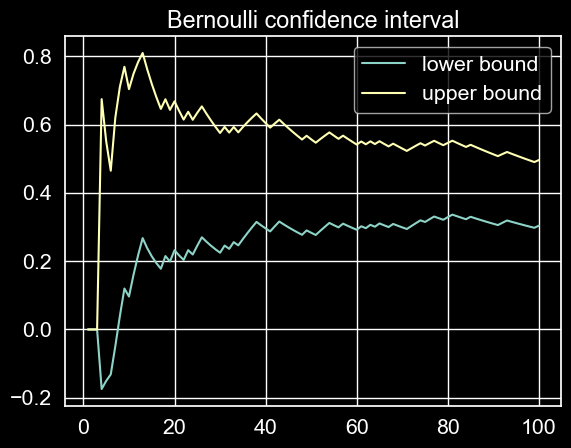

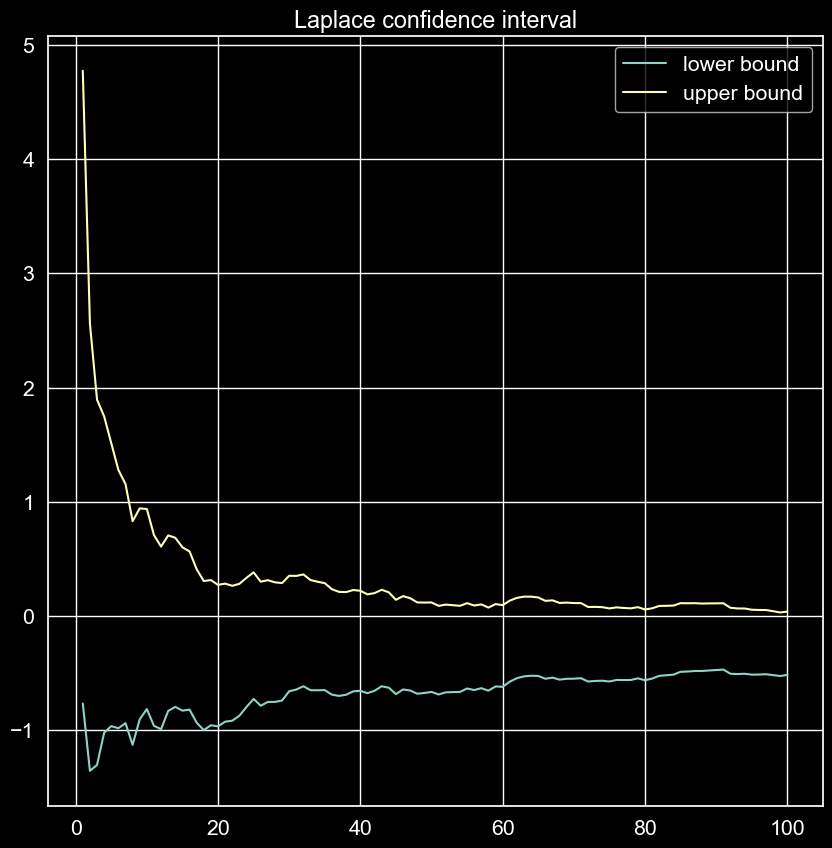

In [80]:
def plot_Bern(x):
    n = len(x)
    L = np.zeros(n)
    R = np.zeros(n)
    for i in range (1, n+1):
        y = []
        for j in range (i):
            y.append(x[j])
        def bernoulli_asymp_confint_l(y, confidence_level=0.95):
            z = len(y)
            mean = np.mean(y)
            quantile = sps.norm(0, 1).ppf((1 + 0.95) / 2)
            variance = sps.bernoulli(np.mean(y)).var()
            k = np.sqrt(variance / z)
            l = mean - quantile * k
            r = mean + quantile * k
            return l
        def bernoulli_asymp_confint_r(y, confidence_level=0.95):
            z = len(y)
            mean = np.mean(y)
            quantile = sps.norm(0, 1).ppf((1 + 0.95) / 2)
            variance = sps.bernoulli(np.mean(y)).var()
            k = np.sqrt(variance / z)
            l = mean - quantile * k
            r = mean + quantile * k
            return r
        L[i-1] = bernoulli_asymp_confint_l(y, confidence_level=0.95)
        R[i-1] = bernoulli_asymp_confint_r(y, confidence_level=0.95)
    plt.plot([i+1 for i in range(100)], L, label='lower bound')
    plt.plot([i+1 for i in range(100)], R, label='upper bound')
    plt.title('Bernoulli confidence interval')
    plt.legend()
    plt.show()

def plot_Lap(x2):
    n2 = len(x2)
    L2 = np.zeros(n2)
    R2 = np.zeros(n2)
    for i in range (1, n2+1):
        y2 = []
        for j in range (i):
            y2.append(x2[j])
        def laplace_asymp_confint_l(y2, confidence_level=0.95):
            z2 = len(y2)
            mean2 = np.mean(y2)
            quantile2 = sps.norm(0, 1).ppf((1 + 0.95) / 2)
            variance2 = sps.laplace(np.mean(y2)).var()
            k2 = np.sqrt(variance2 / z2)
            l2 = mean2 - quantile2 * k2
            r2 = mean2 + quantile2 * k2
            return l2
        def laplace_asymp_confint_r(y2, confidence_level=0.95):
            z2 = len(y2)
            mean2 = np.mean(y2)
            quantile2 = sps.norm(0, 1).ppf((1 + 0.95) / 2)
            variance2 = sps.laplace(np.mean(y2)).var()
            k2 = np.sqrt(variance2 / z2)
            l2 = mean2 - quantile2 * k2
            r2 = mean2 + quantile2 * k2
            return r2
        L2[i-1] = laplace_asymp_confint_l(y2, confidence_level=0.95)
        R2[i-1] = laplace_asymp_confint_r(y2, confidence_level=0.95)
    plt.title('Laplace confidence interval')
    plt.plot([i+1 for i in range(100)], L2, label='lower bound')
    plt.plot([i+1 for i in range(100)], R2, label='upper bound')
    plt.legend()
    plt.show()

x = sps.bernoulli.rvs(1/2, size=100)
x2 = sps.laplace.rvs(0, size=100)
plot_Bern(x)
plt.figure(figsize=(10,10))
plot_Lap(x2)

**Вывод:**

С ростом размера выборки доверительный интервал сужается(как и должно быть)

__________________
### Задача 5

Если у вас еще не установлена <a href="https://miptstats.github.io/courses/python/09_seaborn.html">библиотека `seaborn`</a> для получения красивых графиков, поставьте ее.

In [81]:
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')

Загрузим данные <a target="_blank" href="https://ru.wikipedia.org/wiki/Ирисы_Фишера">"Ирисы Фишера"</a> о цветках ириса различных сортов и посмотрим на первые пять строк таблицы. Для хранения данных используется <a href="https://miptstats.github.io/courses/python/08_pandas1.html#2.-Тип-данных-DataFrame">класс `DataFrame`</a> <a href="https://miptstats.github.io/courses/python/08_pandas1.html">библиотеки `pandas`</a>.

In [82]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Столбцы отвечают за длину и ширину чашелистика и лепестка соответственно, а так же за тип цветка (setosa, virginica, versicolor).

Вектор значений первого столбца можно получить так

In [83]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

Первую строку можно получить так

In [84]:
df.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Таблица с данными только по сорту virginica извлекается следующим образом

In [85]:
df[df['species'] == 'virginica']

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


Визуализируем данные по двумерным проекциям. Цветом обозначен тип цветка.

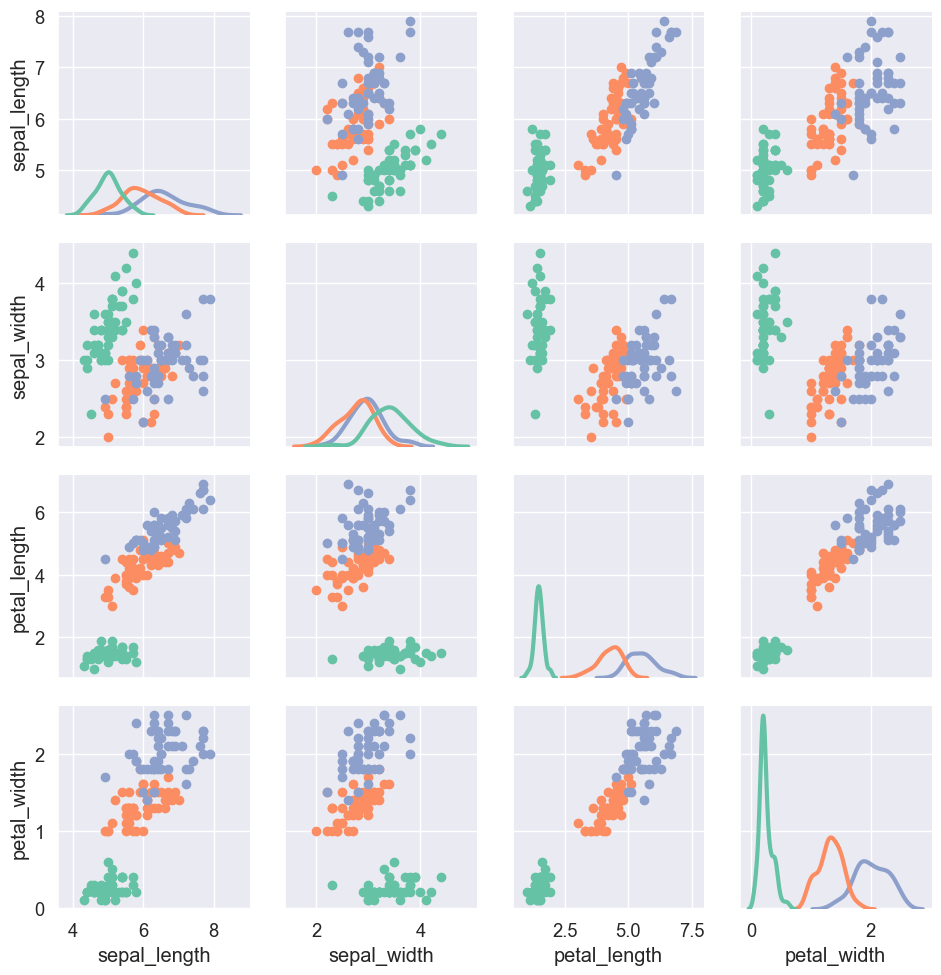

In [86]:
g = sns.PairGrid(df, hue='species')
g.map_offdiag(plt.scatter, cmap ="Blues_d")
g.map_diag(sns.kdeplot, lw=3);

Для каждой характеристики цветка и каждого типа цветка проверьте с помощью <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar3.html#Критерий-Шапиро-Уилка">критерия Шапиро-Уилка</a>, является ли соответствующая выборка нормальной с уровнем значимости $\alpha=0.05$. Всего нужно совешить 12 проверок (4 характеристики, 3 типа). Например, нужно проверить, является ли выборка `df[df['species'] == 'virginica']['sepal_length']` нормальной.

In [87]:
np.array(df.columns)

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [88]:
np.array(np.unique(df.species))

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [89]:
for species in ['virginica', 'setosa', 'versicolor']:
    for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
        print('specie: ', species, '\t feature: ', feature)
        print(sps.shapiro(df[df['species'] == species][feature]))
        if sps.shapiro(df[df['species'] == species][feature])[1] < 0.05:
            print('Reject the hypothesis of sample normality')
        print('\n')

specie:  virginica 	 feature:  sepal_length
ShapiroResult(statistic=0.9711793661117554, pvalue=0.25831347703933716)


specie:  virginica 	 feature:  sepal_width
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


specie:  virginica 	 feature:  petal_length
ShapiroResult(statistic=0.9621864557266235, pvalue=0.10977503657341003)


specie:  virginica 	 feature:  petal_width
ShapiroResult(statistic=0.9597713351249695, pvalue=0.08695302903652191)


specie:  setosa 	 feature:  sepal_length
ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)


specie:  setosa 	 feature:  sepal_width
ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)


specie:  setosa 	 feature:  petal_length
ShapiroResult(statistic=0.9549767971038818, pvalue=0.05481128394603729)


specie:  setosa 	 feature:  petal_width
ShapiroResult(statistic=0.7997646331787109, pvalue=8.658606134304137e-07)
Reject the hypothesis of sample normality


specie:  versicolor 	 feature: 

Отвергли гипотезы нормальности для: 

specie:  setosa 	 feature:  petal_width

и

specie:  versicolor 	 feature:  petal_width


Теперь для каждой характеристики для всех пар типов цветка проверьте с уровнем значимости $\alpha=0.05$, отличаются ли значения данной харатеристики для этих типов цветков (см. <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar3_presentation.pdf">презентацию с семинара</a>). Если для обеих выборок нормальность выше не отверглась, используйте <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar3.html#T-критерий-Стьюдента-—-независимые-выборки">критерий Стьюдента</a>, иначе пользуйтесь <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar3.html#Критерий-Смирнова">критерием Смирнова</a>. Например, нужно проверить, отличаются ли распределения выборкок `df[df['species'] == 'setosa']['sepal_length']` и `df[df['species'] == 'virginica']['sepal_length']`.

*Замечание*. Для применения критерия Стьюдента было бы правильнее предварительно проверить, что дисперсии выборок совпадает, но в данном задании это можно не делать.

In [90]:
species = ['virginica', 'setosa', 'versicolor']
samples = np.zeros((3, 50))
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    for i in range(3):
        samples[i] = df[df['species'] == species[i]][feature]
    
    if feature == 'petal_length':
        for i in range(3):
            for j in range(i+1, 3):
                print('species: ', species[i], ',', species[j], '\t feature:  petal_length')
                print(sps.ks_2samp(samples[i], samples[j]))
                if sps.ks_2samp(samples[i], samples[j])[1] < 0.05:
                    print('Reject the hypothesis of distributions equality by Smirnov\'s test')
                print('\n')
    else:
        for i in range(3):
            for j in range(i+1, 3):
                print('species: ', species[i], ',', species[j], '\t feature: ', feature)
                print(sps.ttest_ind(samples[i], samples[j]))
                if sps.ttest_ind(samples[i], samples[j])[1] < 0.05:
                    print('Reject the hypothesis of loc parameter by Student\'s test ')
                print('\n')
                    
    print('\n')

species:  virginica , setosa 	 feature:  sepal_length
TtestResult(statistic=15.386195820079404, pvalue=6.892546060674059e-28, df=98.0)
Reject the hypothesis of loc parameter by Student's test 


species:  virginica , versicolor 	 feature:  sepal_length
TtestResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07, df=98.0)
Reject the hypothesis of loc parameter by Student's test 


species:  setosa , versicolor 	 feature:  sepal_length
TtestResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18, df=98.0)
Reject the hypothesis of loc parameter by Student's test 




species:  virginica , setosa 	 feature:  sepal_width
TtestResult(statistic=-6.45034908963073, pvalue=4.2463553818449584e-09, df=98.0)
Reject the hypothesis of loc parameter by Student's test 


species:  virginica , versicolor 	 feature:  sepal_width
TtestResult(statistic=3.2057607502218186, pvalue=0.0018191004238894803, df=98.0)
Reject the hypothesis of loc parameter by Student's test 


species:  setosa

**Вывод:**

Отвергли гипотезу совпадения параметров среднего критерием Стьюдента для всех пар выборок с с признаками кроме petal_length(в этом случае мы уже отвергли гипотезу о нормальности критерием Шапиро-Уилка).
Отвергли гипотезу совпадения функций распределения критерием Смирнова для пар выборок с признаком petal_length.

__________________
### Задача 6

Сколько проверок статистических гипотез пришлось совершить в предыдущей задачи?

Всего пар из различных типов $C_3^2 = 3$. Признаков всего 4. Итого, 12 проверки.

Каким числом ограничена вероятность ошибки первого рода в каждой проверке?

<...>

Такую ошибку мы могли совершить в каждой проверке. Вероятность совершения хотя бы одной ошибки первого рода среди всех проверок не превосходит произведения указанных вами чисел. Но нам хотелось бы, чтобы вероятность совершения хотя бы одной ошибки первого рода не превосходила $\alpha=0.05$. Можете ли вы предложить решение данной проблемы?

<...>

Реализуйте этот способ для предыдущей задачи

***Вывод:** <...>